# Tarea 2. Interpolación y extrapolación.
## Técnicas computacionales y estadísticas

#### 1. Como parte del seguimiento de las fuentes de calibracion para el Gran Telescopio Milimétrico se realizaron las siguientes observaciones del blazar 3c84 en la banda de 3mm:
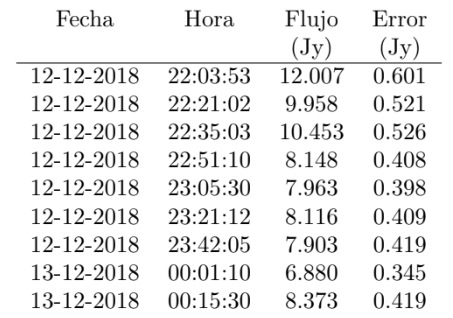

Se desea comparar con las observaciones dle mismo día realizadas con XMM-Newton en los horarios: 21:55:00, 22:30:00, 23:45:00, 00:10:00. 
Encuentre los valores de flujo en los tiempos indicados usando:

(a) Interpolación lineal

(b) Polinomio de Lagrange (expresar la forma funcional del polinomio en el reporte)

(c) Interpolación con Splines cúbicos.

Representar gráficamente los resultados originales y las funciones interpoladas. Dsicuta las características de las funciones interpoladas y cómo afectan la validez y precisión de los resultados.

In [24]:
import numpy as np
from astropy.time import Time

# Primero necesitamos convertir las columnas de fecha y hora a 
# una variable continua que permita hacer la interpolación
times = ['2018-12-12T22:03:53', 
         '2018-12-12T22:21:02',
         '2018-12-12T22:35:03', 
         '2018-12-12T22:51:10',
         '2018-12-12T23:05:30',
         '2018-12-12T23:21:12',
         '2018-12-12T23:42:05',
         '2018-12-13T00:01:10',
         '2018-12-13T00:15:30'] 

t = Time(times) 
print(t.mjd)                           # fechas en modified julian day [MJD]

# Los tiempos para comparar con XMM-Newton son:
#de momento ignoramos el primer valor que esta fuera del rango de los datos originales
tnew = ['2018-12-12T21:55:30',
        '2018-12-12T22:30:00',
        '2018-12-12T23:45:00',
        '2018-12-13T00:10:00']
t1 = Time(tnew)
print(t1.mjd)

tGTM = np.asarray(t.mjd)
tXMM = np.asarray(t1.mjd)
#print(type(tGTM), type(tXMM))

# Conocemos los valores de flujo obtenidos en GTM
# Estamos buscando los valores en GTM que se podrían compara con XMM-Newton.
# Los datos originales: 
fl = [12.007, 9.958, 10.453, 8.148, 7.963, 8.116, 7.903, 6.880, 8.373]
flux = np.asarray(fl)
#print(type(flux))


[58464.91936343 58464.93127315 58464.94100694 58464.95219907
 58464.96215278 58464.97305556 58464.98755787 58465.00081019
 58465.01076389]
[58464.91354167 58464.9375     58464.98958333 58465.00694444]


tXMM:  [58464.91354167 58464.9375     58464.98958333 58465.00694444] 
f(txMM): [13.00860058 10.27465874  7.74664629  7.80010465]


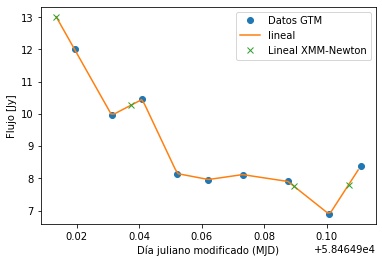

In [6]:
#Interpolamos 
#Usando scipy.interpolate
#graficamos los puntos originales y las funciones interpoladas.
from scipy import interpolate
import matplotlib.pyplot as plt

# Método lineal. 
# Usamos la opción fill_value='extrapolate' para considerar el valor que estamos buscando
# en un tiempo que esta fuera del rango original en las mediciones.
f = interpolate.interp1d(tGTM, flux, fill_value='extrapolate')

xf = np.linspace(58464.9135,58465.01,100)


plt.plot(tGTM, flux, 'o', xf, f(xf), '-', tXMM, f(tXMM), 'x')     
plt.legend(['Datos GTM', 'lineal', 'Lineal XMM-Newton'], loc='best')

print('tXMM: ', tXMM, '\nf(txMM):', f(tXMM))
plt.xlabel('Día juliano modificado (MJD)')
plt.ylabel('Flujo [Jy]')
plt.savefig('pb1-1.png')


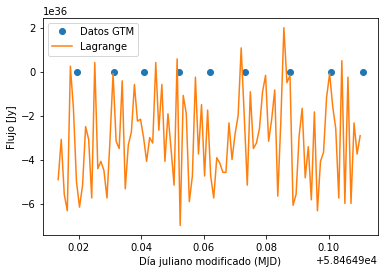

In [26]:
# Método polinomios de Lagrange
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange

L=lagrange(tGTM, flux)

c = Polynomial(L).coef                  #Los coeficientes de L
yf = [np.polyval(c, i) for i in xf]

plt.plot(tGTM, flux, 'o', xf, yf)    
plt.legend(['Datos GTM', 'Lagrange', 'Datos vs XMM-Newton'], loc='best')
plt.xlabel('Día juliano modificado (MJD)')
plt.ylabel('Flujo [Jy]')
plt.savefig('pb1-2.png')
#Como se puede ver de la gráfica la interpolación apesta. 
#De la documentación >> Warning: This implementation is numerically unstable. 
#Do not expect to be able to use more than about 20 points even if they are chosen optimally.


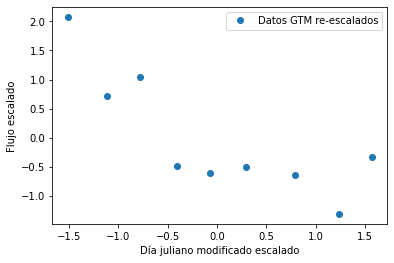

In [27]:
# Le damos otra oportunidad a Lagrange 
# escalando los datos para que tengan media=0 y std=1.

xm = np.mean(tGTM)
xscale = np.std(tGTM)
ym = np.mean(flux)
yscale = np.std(flux)
x = (tGTM - xm) / xscale
y = (flux - ym) / yscale

plt.plot(x,y,'o')
plt.legend(['Datos GTM re-escalados'], loc='best')
plt.xlabel('Día juliano modificado escalado')
plt.ylabel('Flujo escalado')
plt.savefig('pb1-3.png')

Coeficientes del polinomio:
 [ 1.98801259 -1.49653434 -7.4350523   5.59288011  7.1181592  -5.76846334
 -0.80383099  0.70333725 -0.54621928]


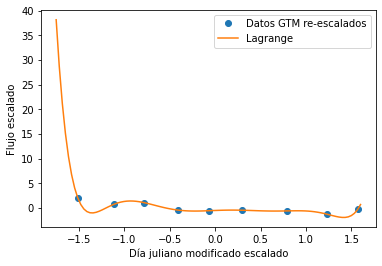

In [28]:
# 
L2 = lagrange(x, y)
print('Coeficientes del polinomio:\n',Polynomial(L2).coef)
coef = Polynomial(L2).coef        #usamos los coeficientes del polinomio para reconstruirlo y graficarlo.
xx = np.linspace(-1.75,1.6,100)
yy = [np.polyval(coef, i) for i in xx]

plt.plot(x, y, 'o', xx, yy, '-')
plt.legend(['Datos GTM re-escalados', 'Lagrange'], loc='best')
plt.xlabel('Día juliano modificado escalado')
plt.ylabel('Flujo escalado')
plt.savefig('pb1-4.png')

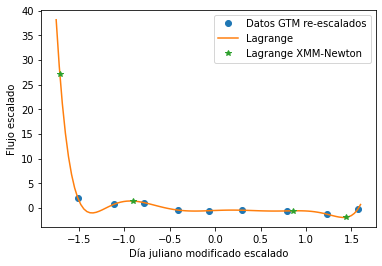

In [29]:
# Los valores que buscamos usando este método de interpolación:
# primero escalamos tXMM
txmm_e = (tXMM - xm) / xscale
#ahora si los metemos al polinomio:
L2(txmm_e)

plt.plot(x, y, 'o', xx, yy, txmm_e, L2(txmm_e), '*')
plt.legend(['Datos GTM re-escalados', 'Lagrange','Lagrange XMM-Newton'], loc='best')
plt.xlabel('Día juliano modificado escalado')
plt.ylabel('Flujo escalado')
plt.savefig('pb1-5.png')

Flujos XMM-Newton escalados: [27.23248074  1.36486688 -0.61534468 -1.9388369 ]
Flujos comparables con XMM-Newton (desescalados): [50.05195293 10.93094087  7.93615825  5.93456834] Jy


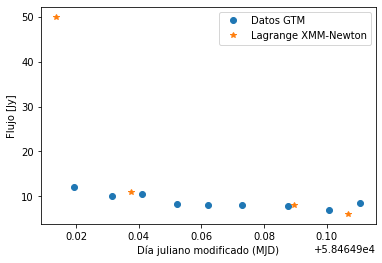

In [30]:
# Desescalamos los datos para hallar los flujos comparables con XMM-Newton

print('Flujos XMM-Newton escalados:', L2(txmm_e))

#T_new = tXXM
F_new = L2(txmm_e)*yscale + ym
#print('yscale=',yscale,'ym=', ym)
print('Flujos comparables con XMM-Newton (desescalados):', F_new, 'Jy')

plt.plot(tGTM, flux, 'o', tXMM, F_new, '*')    
plt.legend(['Datos GTM', 'Lagrange XMM-Newton'], loc='best')
plt.xlabel('Día juliano modificado (MJD)')
plt.ylabel('Flujo [Jy]')
plt.savefig('pb1-6.png')
#No se me ocurre como desescalar el polinomio,
#pero sabemos que cualquier 'x' que metamos tiene que ser escalada
#y cualquier 'y' obtenida de él tiene que desescalarse. 

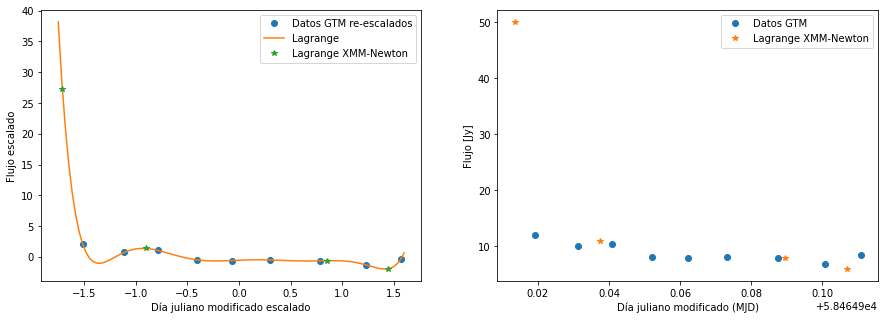

In [31]:
#grafica de 2 paneles Lagrange
plt.subplot(121)
plt.plot(x, y, 'o', xx, yy, txmm_e, L2(txmm_e), '*')
plt.legend(['Datos GTM re-escalados', 'Lagrange','Lagrange XMM-Newton'], loc='best')
plt.xlabel('Día juliano modificado escalado')
plt.ylabel('Flujo escalado')


plt.subplot(122)
plt.plot(tGTM, flux, 'o', tXMM, F_new, '*')    
plt.legend(['Datos GTM', 'Lagrange XMM-Newton'], loc='best')
plt.xlabel('Día juliano modificado (MJD)')
plt.ylabel('Flujo [Jy]')
plt.gcf().set_size_inches(15,5)
plt.show()


Método spline cúbico. 
Documentación: https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#spline-interpolation

flujo spline cúbico: [17.3312754  10.50509887  7.7357961   7.37101314] Jy


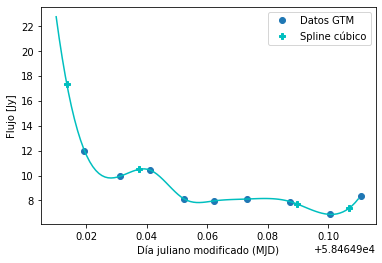

In [15]:
# Método Spline cúbico.
#tGTM
#flux
tck = interpolate.splrep(tGTM, flux, s=0)
#tXMM    puntos a interpolar
f_cs = interpolate.splev(tXMM, tck, der=0)

x_x = np.linspace(58464.91,58465.01,100)
y_y = interpolate.splev(x_x, tck, der=0)

print('flujo spline cúbico:', f_cs, 'Jy')

plt.plot(tGTM,flux, 'o',tXMM, f_cs, 'cP', x_x,y_y,'c')
plt.xlabel('Día juliano modificado (MJD)')
plt.ylabel('Flujo [Jy]')
plt.legend(['Datos GTM', 'Spline cúbico'], loc='best')
plt.savefig('pb1-7.png')

lineal:    [13.00860058 10.27465874  7.74664629  7.80010465]
Lagrange:   [50.05195293 10.93094087  7.93615825  5.93456834]
Spline c.:  [17.3312754  10.50509887  7.7357961   7.37101314]


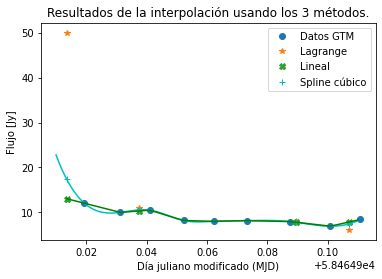

In [16]:
plt.plot(tGTM, flux, 'o', tXMM, F_new, '*', tXMM,f(tXMM),'X', tXMM, f_cs, 'c+',x_x,y_y,'c',xf,f(xf),'g-')    
plt.legend(['Datos GTM', 'Lagrange', 'Lineal', 'Spline cúbico'], loc='best')
plt.xlabel('Día juliano modificado (MJD)')
plt.ylabel('Flujo [Jy]')
plt.title('Resultados de la interpolación usando los 3 métodos.')
print('lineal:   ',f(tXMM))
print('Lagrange:  ',F_new)
print('Spline c.: ',f_cs)
plt.savefig('pb1-8.png')

#### b) Implementación de la interpolación usando Polinomio de Lagrange
https://stackoverflow.com/questions/4003794/lagrange-interpolation-in-python


In [17]:
# (b) Implementación de la interpolación usando Polinomio de Lagrange



#### 2. A partir del archivo aztec_pointing.txt hacer lo que se pide,
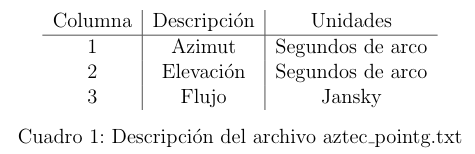
Debido a la geometría y el funcionamiento de los bolómetros de la cámara, la imagen necesita reconstruirse utilizando métodos de interpolación. Empleando las funciones <font color=blue>griddata</font> y <font color=blue>Rbf</font> de la librería <font color=blue>scipy.interpolate</font> encuentre:

In [18]:
# abrir archivo aztec_pointing.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


f = pd.read_csv('aztec_pointing.txt', sep=" ", header=None)
f.columns = ["x", "y", "z"]    # x=azimut, y=elevación, z=flujo
#print(f)
x = f.x
y = f.y
z = f.z
#print(x,y,z)

# exploramos el archivo:
print('El flujo mínimo en el archivo es:',  np.min(z), 'Jy')
print('El flujo máximo en el archivo es: ', np.max(z), ' Jy')
print('azimut mín:   ', np.min(x), 'arcsec')
print('azimut máx:    ', np.max(x), 'arcsec')
print('elevación mín:',np.min(y), ' arcsec')
print('elevacióñ máx: ',np.max(y), 'arcsec')

# encontramos las coordenadas del máximo en el archivo y el máximo
fmax = f[f.z.eq(np.max(z))]
print('\n(a)\n\nLas coordenadas del máximo en el archivo y el máximo:\n',fmax)
print('(donde x=azimut, y=elevación, z=flujo)')
print('==================================================================')


El flujo mínimo en el archivo es: -0.7658969447487127 Jy
El flujo máximo en el archivo es:  5.967622420538901  Jy
azimut mín:    -40.61100006103516 arcsec
azimut máx:     45.91983795166016 arcsec
elevación mín: -45.2830467224121  arcsec
elevacióñ máx:  46.113399505615234 arcsec

(a)

Las coordenadas del máximo en el archivo y el máximo:
             x          y         z
32  19.665945 -17.179993  5.967622
(donde x=azimut, y=elevación, z=flujo)


In [19]:
from scipy.interpolate import griddata
import cmasher as cmr

# define grid.
xi = np.linspace(-47,47,100)
yi = np.linspace(-47,47,100)

# grid the data.
zi0 = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
zi1 = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

#quitamos los NaN
z0 = zi0[np.logical_not(np.isnan(zi0))]
z1 = zi1[np.logical_not(np.isnan(zi1))]
#print(z0, z1)

#posición de los máximos:
p0 = np.where(zi0 == np.max(z0)) 
p1 = np.where(zi1 == np.max(z1)) 
#El máximo de z0 los buscamos en zi0 
#así hallamos sus coordenadas en xi, yi

print('\n(b) griddata\n')
print('Máximo del flujo usando linear:',np.max(z0), 'Jy')
print('posición del máximo: x=',xi[p0[1]],'y=',yi[p0[0]]) 

print('\nMáximo del flujo usando cubic:', np.max(z1), 'Jy')
print('posición del máximo: x=',xi[p1[1]],'y=',yi[p1[0]]) 



(b) griddata

Máximo del flujo usando linear: 5.920774843981539 Jy
posición del máximo: x= [19.46464646] y= [-17.56565657]

Máximo del flujo usando cubic: 6.749593860479809 Jy
posición del máximo: x= [19.46464646] y= [-21.36363636]


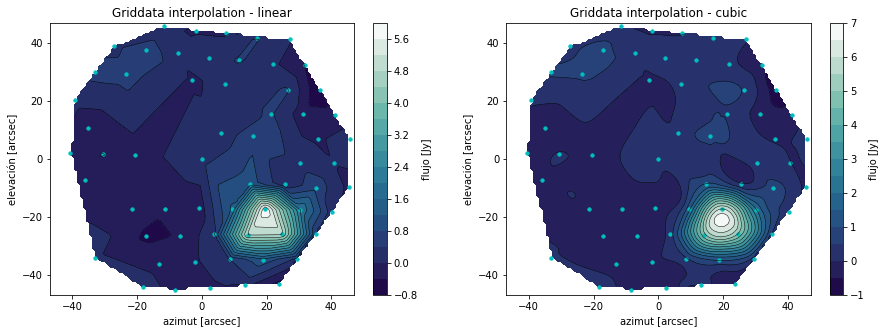

In [20]:
# contour the gridded data, plotting dots at the randomly spaced data points.
plt.subplot(121)
plt.contour(xi,yi,zi0,17,linewidths=0.5,colors='k')
plt.contourf(xi,yi,zi0,17,cmap='cmr.ocean')
plt.colorbar(label='flujo [Jy]')       
# plot data points.
plt.scatter(x,y,marker='o',c='c',s=11)
plt.xlabel('azimut [arcsec]')
plt.ylabel('elevación [arcsec]')
plt.title('Griddata interpolation - linear')

#
plt.subplot(122)
plt.contour(xi,yi,zi1,17,linewidths=0.5,colors='k')
plt.contourf(xi,yi,zi1,17,cmap='cmr.ocean')
plt.colorbar(label='flujo [Jy]')       
# plot data points.
plt.scatter(x,y,marker='o',c='c',s=11)
plt.xlabel('azimut [arcsec]')
plt.ylabel('elevación [arcsec]')
plt.title('Griddata interpolation - cubic')
#
plt.gcf().set_size_inches(15,5)
plt.show()
#plt.savefig('pb2-1.eps') #No se guardar esta gráfica


(b) Rbf

Máximo del flujo usando multiquadric: 7.2252135429586914 Jy
posición del máximo: x= [19.46464646] y= [-22.31313131] 

Máximo del flujo usando inverse     : 7.1911658535113965 Jy
posición del máximo: x= [19.46464646] y= [-21.36363636] 

Máximo del flujo usando thin-plate  : 6.552410193965212 Jy
posición del máximo: x= [19.46464646] y= [-21.36363636] 

Máximo del flujo usando gaussian    : 7.34458161726135 Jy
posición del máximo: x= [19.46464646] y= [-22.31313131] 



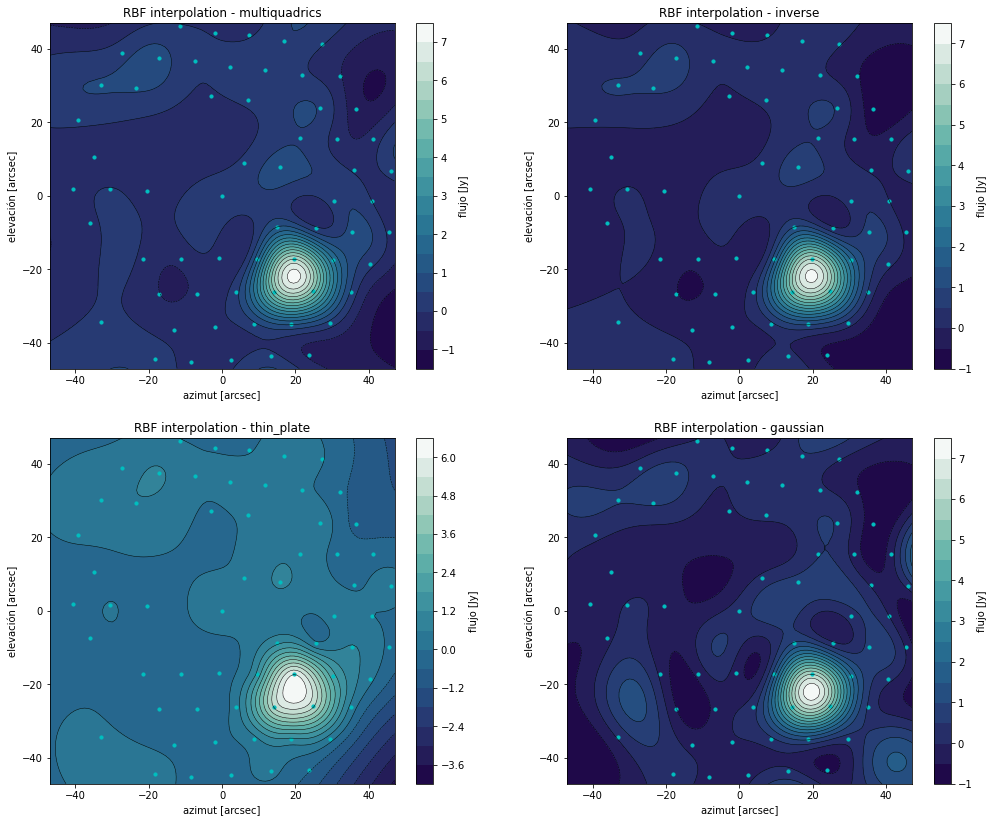

In [38]:
# Radial basis functions.
from scipy.interpolate import Rbf
#y en el caso de las funciones radiales emplee las opciones multiquadric, inverse, thin
#plate y gaussian.
# r0 = 17"
eps = 17 #arcsec
ti = np.linspace(-47., 47., 100)
xx, yy = np.meshgrid(ti, ti)
#
rbfM = Rbf(x, y, z, epsilon=eps, function='multiquadric')
z_M = rbfM(xx, yy)

rbfI = Rbf(x, y, z, epsilon=eps, function='inverse')
z_I = rbfI(xx, yy)

rbfT = Rbf(x, y, z, epsilon=eps, function='thin_plate')
z_T = rbfT(xx, yy)

rbfG = Rbf(x, y, z, epsilon=eps, function='gaussian')
z_G = rbfG(xx, yy)

#Para hallar la posición del flujo máximo necesitamos su índice:
pM = np.where(z_M == np.max(z_M)) 
pI = np.where(z_I == np.max(z_I)) 
pT = np.where(z_T == np.max(z_T)) 
pG = np.where(z_G == np.max(z_G)) 


print('\n(b) Rbf\n')
print('Máximo del flujo usando multiquadric:',np.max(z_M), 'Jy')
print('posición del máximo: x=',xx[pM],'y=',yy[pM],'\n') 

print('Máximo del flujo usando inverse     :',np.max(z_I), 'Jy')
print('posición del máximo: x=',xx[pI],'y=',yy[pI],'\n') 

print('Máximo del flujo usando thin-plate  :',np.max(z_T), 'Jy')
print('posición del máximo: x=',xx[pT],'y=',yy[pT],'\n') 

print('Máximo del flujo usando gaussian    :',np.max(z_G), 'Jy')
print('posición del máximo: x=',xx[pG],'y=',yy[pG],'\n') 


#
plt.subplot(221)
plt.contour(xx,yy,z_M, 17, linewidths=0.5, colors='k')
plt.contourf(xx,yy,z_M, 17, cmap='cmr.ocean')
plt.colorbar(label='flujo [Jy]')       
# data
plt.scatter(x,y,marker='o',c='c',s=10)
plt.title('RBF interpolation - multiquadrics')
plt.xlabel('azimut [arcsec]')
plt.ylabel('elevación [arcsec]')
##
plt.subplot(222)
plt.contour(xx,yy,z_I, 17, linewidths=0.5, colors='k')
plt.contourf(xx,yy,z_I, 17, cmap='cmr.ocean')
plt.colorbar(label='flujo [Jy]')       
# data
plt.scatter(x,y,marker='o',c='c',s=10)
plt.title('RBF interpolation - inverse')
plt.xlabel('azimut [arcsec]')
plt.ylabel('elevación [arcsec]')
##
plt.subplot(223)
plt.contour(xx,yy,z_T, 17, linewidths=0.5, colors='k')
plt.contourf(xx,yy,z_T, 17, cmap='cmr.ocean')
plt.colorbar(label='flujo [Jy]')       
# data
plt.scatter(x,y,marker='o',c='c',s=10)
plt.title('RBF interpolation - thin_plate')
plt.xlabel('azimut [arcsec]')
plt.ylabel('elevación [arcsec]')
#
plt.subplot(224)
plt.contour(xx,yy,z_G, 17, linewidths=0.5, colors='k')
plt.contourf(xx,yy,z_G, 17, cmap='cmr.ocean')
plt.colorbar(label='flujo [Jy]')       
# data
plt.scatter(x,y,marker='o',c='c',s=10)
plt.title('RBF interpolation - gaussian')
plt.xlabel('azimut [arcsec]')
plt.ylabel('elevación [arcsec]')
###
plt.gcf().set_size_inches(17,14)
plt.show()
#plt.savefig('pb2_Rbf.png')